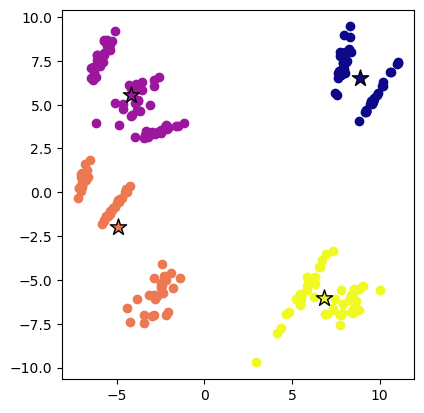

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# computes distance without sqrt - used only for comparison
# d = datapoint (tuple/list containing all values for datapoint), c = centroid (tuple/list containing all values for centroid)
def distRel(d, c):

    # another one-liner, essentially just performing euclidean distance between datapoint and centroid (any amount of dimensions)
    return np.sum(np.apply_along_axis(lambda r: (r[0]-r[1])*(r[0]-r[1]), 1, np.column_stack((d, c))))



# compute k-means using given datapoints and k value
def kMeans(arr, k):

    # assign each point a random cluster
    assignments = np.random.randint(0, k, arr.shape[0])

    # make sure every cluster has at least one datapoint
    while not len(np.unique(assignments)) == k:
        assignments = np.random.randint(0, k, arr.shape[0])

    # create empty 2D array to store values for each centroid
    centroids = np.empty((k, arr.shape[1]))

    # will loop until the previous assignments array is the same as the new one
    while True:

        # create empty matrix to store distances to all centroids for each datapoint
        # each row is a datapoint, and each column is a centroid
        # each element is distance from given datapoint to given centroid
        distances = np.empty((arr.shape[0], k))

        # loop through each cluster
        for i in range(k):

            # only get points belonging to ith cluster (from ChatGPT)
            subset = data[np.where(assignments == i)]

            # compute means of each column (centroid location)
            # if the cluster has no datapoints in it, re-use previous value instead                
            centroid = centroids[i] if len(subset) == 0 else np.mean(subset, axis=0)
            centroids[i] = centroid

            # compute distances to each datapoint and save them in the appropriate column in 'distances'
            distances[:, i] = np.apply_along_axis(distRel, 1, arr, centroid)

        # generate new assignments array which uses distances matrix to determine smallest distance for each datapoint
        newAssignments = np.argmin(distances, axis=1)

        # if the new assignments array is the same as the old one, the clustering has stabilized, and we are done
        if(np.array_equal(assignments, newAssignments)):
            break

        # restart the loop with new assignments
        assignments = newAssignments

    # compute average distance form every data point to its centroid
    # this was created with fairly heavy use of ChatGPT
    avgDist = np.mean(np.linalg.norm(data - centroids[assignments], axis=1))

    # return necessary information: k x m matrix of centroids, n x 1 vector of integers describing cluster assignments,
    # and average distance from every data point to its centroid
    return (centroids, assignments, avgDist)



# prints data with clusters and centroids in a scatterplot using pyplot
# argument is a tuple with required info: (datapoints, k, cluster assignments, centroid locations)
# getting the colors to match with mask and color mapping was done with help from ChatGPT
def printData(infoTuple):

    # grab info from tuple
    data = infoTuple[0]
    k = infoTuple[1]
    assignments = infoTuple[2]
    centroids = infoTuple[3]

    # choose color map from pyplot
    cmap = plt.get_cmap('plasma', k)

    # create subplot in order to ensure equal aspects for axes
    p = plt.subplots()[1]

    # loop over every cluster
    for i in range(k):

        # use same color for both datapoints and centroids
        color = cmap(i)

        # for each cluster, only plot datapoints that belong to that cluster
        mask = assignments == i
        p.scatter(data[mask, 0], data[mask, 1], color=color, label=f'Cluster {i}')

        # also plot that cluster's centroid
        p.scatter(centroids[i, 0], centroids[i, 1], color=color, marker='*', s=150, edgecolor='black')

    # ensure scatterplot axes are exactly square (distances are correct)
    p.set_aspect('equal')

    # show scatterplot
    plt.show()

data = np.genfromtxt("datasets/somepoints.csv", delimiter=",")[1:]

kk = 4
result = kMeans(data, kk)
printData((data, kk, result[1], result[0]))